In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
#data=pd.read_csv('column_2C_weka.csv')

data1=pd.read_csv("column_2C_weka.csv")
data2=pd.read_csv("column_3C_weka.csv")

all_dfs = [data1, data2]
for df in all_dfs:
    df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']

data=pd.concat(all_dfs).reset_index(drop=True)

In [9]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [10]:
#Code to take out space

#data.columns=data.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')','')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 7 columns):
pelvic_incidence            620 non-null float64
pelvic_tilt                 620 non-null float64
lumbar_lordosis_angle       620 non-null float64
sacral_slope                620 non-null float64
pelvic_radius               620 non-null float64
degree_spondylolisthesis    620 non-null float64
class                       620 non-null object
dtypes: float64(6), object(1)
memory usage: 34.0+ KB


In [12]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.222592,10.000243,18.539071,13.412255,13.306616,37.528676
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.426366,10.659859,37.000000,33.340707,110.708958,1.594748
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.955644,22.181798,63.000000,52.744711,125.480174,41.422828
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [13]:
data.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [14]:
data.corr().unstack().sort_values().drop_duplicates()

pelvic_radius             sacral_slope               -0.342128
pelvic_incidence          pelvic_radius              -0.247467
pelvic_radius             lumbar_lordosis_angle      -0.080344
                          degree_spondylolisthesis   -0.026065
pelvic_tilt               pelvic_radius               0.032668
                          sacral_slope                0.062345
                          degree_spondylolisthesis    0.397862
lumbar_lordosis_angle     pelvic_tilt                 0.432764
sacral_slope              degree_spondylolisthesis    0.523557
lumbar_lordosis_angle     degree_spondylolisthesis    0.533667
                          sacral_slope                0.598387
pelvic_tilt               pelvic_incidence            0.629199
degree_spondylolisthesis  pelvic_incidence            0.638743
lumbar_lordosis_angle     pelvic_incidence            0.717282
pelvic_incidence          sacral_slope                0.814960
                          pelvic_incidence            1

Abnormal             210
Normal               200
Spondylolisthesis    150
Hernia                60
Name: class, dtype: int64

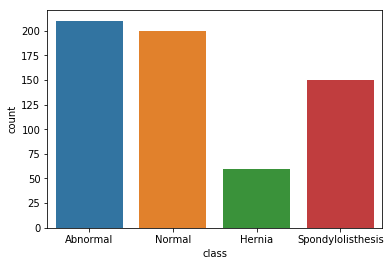

In [15]:
sns.countplot(x='class', data=data)
data.loc[:,'class'].value_counts()

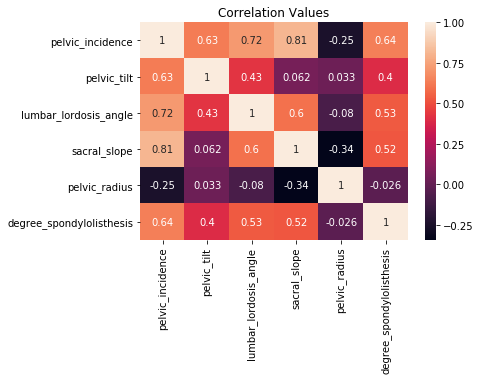

In [16]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Values')
plt.show()

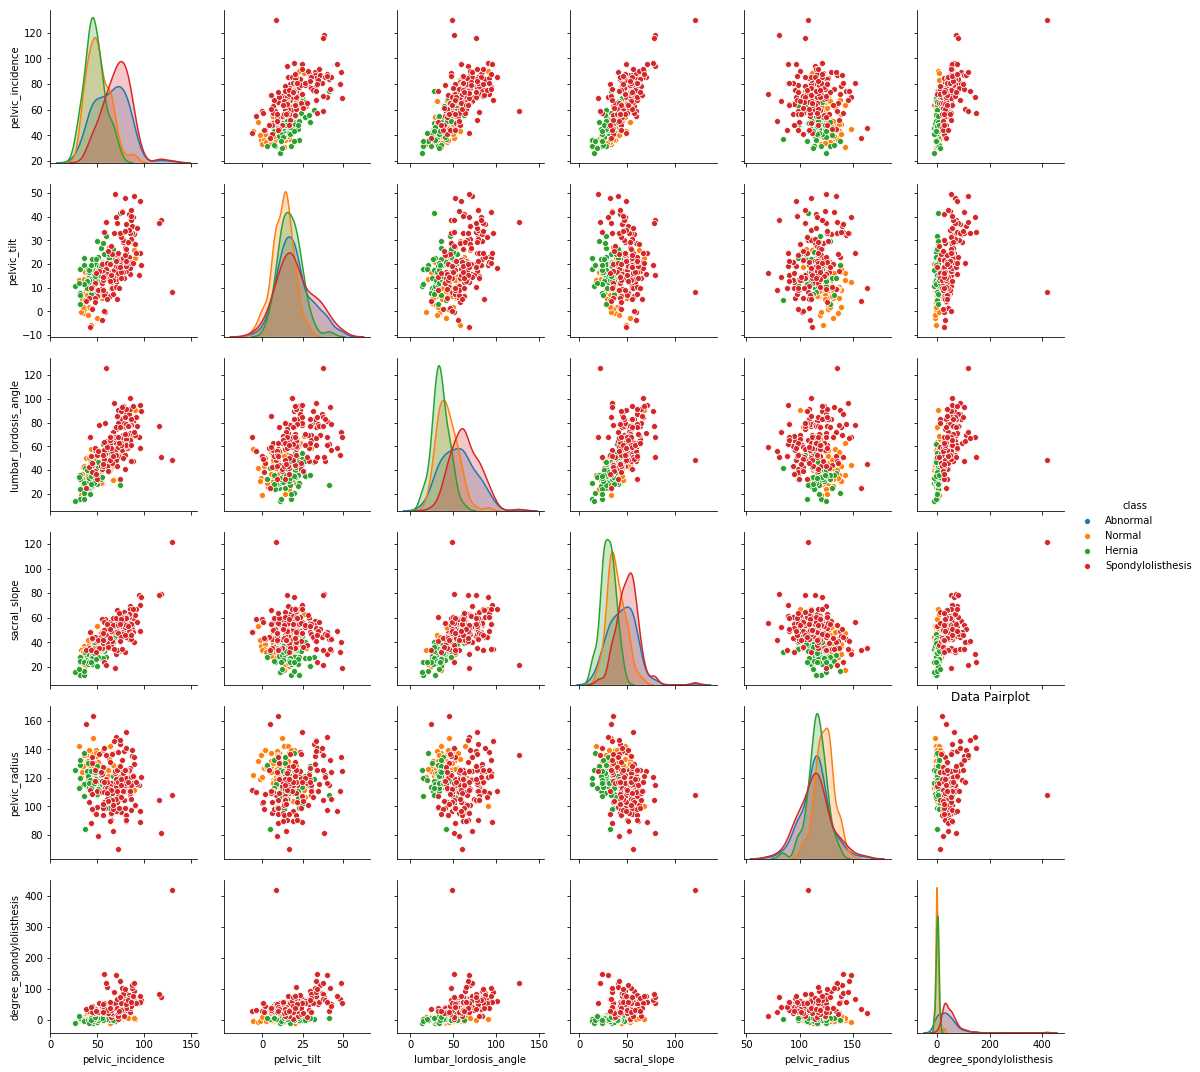

In [17]:
sns.pairplot(data=data, hue='class')
plt.title('Data Pairplot')
plt.show()

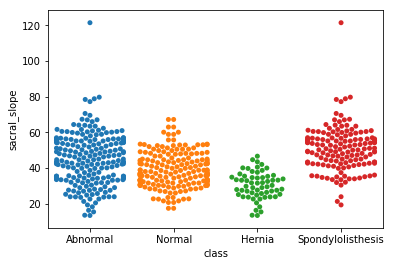

In [18]:
sns.swarmplot(x='class', y='sacral_slope', data=data)

In [49]:
sns.swarmplot(x='class', y='pelvic_tilt numeric', data=data)

ValueError: Could not interpret input 'pelvic_tilt numeric'

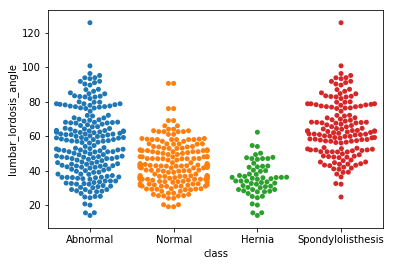

In [21]:
sns.swarmplot(x='class', y='lumbar_lordosis_angle', data=data)

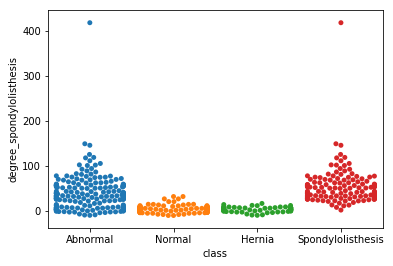

In [22]:
sns.swarmplot(x='class', y='degree_spondylolisthesis', data=data)

In [23]:
normal=data[data['class']=='Normal']
abnormal=data[data['class']=='Abnormal']


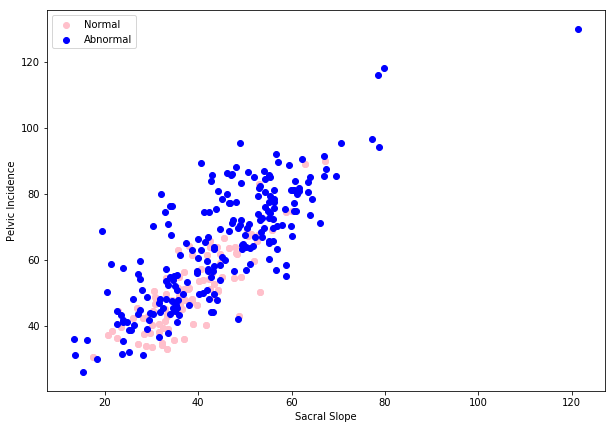

In [24]:
plt.figure(figsize=[10,7])
plt.scatter(normal.sacral_slope, normal.pelvic_incidence, label='Normal', color='pink')
plt.scatter(abnormal.sacral_slope, abnormal.pelvic_incidence, label='Abnormal', color='blue')
plt.xlabel('Sacral Slope')
plt.ylabel('Pelvic Incidence')     # good #
plt.legend()
plt.show()

In [25]:
plt.figure(figsize=[10,7])
plt.scatter(normal.pelvic_tilt_numeric, normal.pelvic_incidence, label='Normal', color='pink')
plt.scatter(abnormal.pelvic_tilt_numeric, abnormal.pelvic_incidence, label='Abnormal', color='blue')
plt.xlabel('Pelvic Tilt')
plt.ylabel('Pelvic Incidence')
plt.legend()         # exclude this scatter plot because it doesn't recognize pelvic_tilt_numeric
plt.show()

AttributeError: 'DataFrame' object has no attribute 'pelvic_tilt_numeric'

<Figure size 720x504 with 0 Axes>

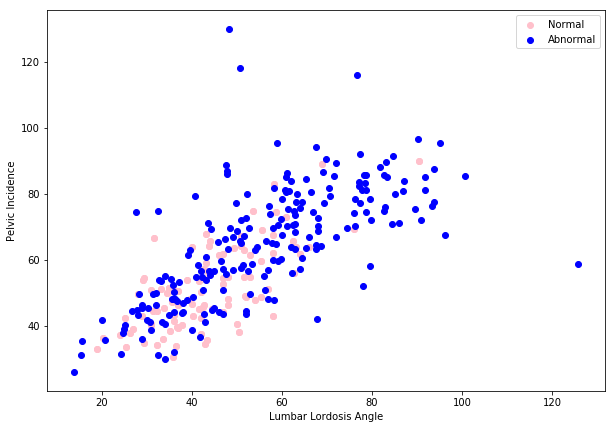

In [26]:
plt.figure(figsize=[10,7])
plt.scatter(normal.lumbar_lordosis_angle, normal.pelvic_incidence, label='Normal', color='pink')
plt.scatter(abnormal.lumbar_lordosis_angle, abnormal.pelvic_incidence, label='Abnormal', color='blue')
plt.xlabel('Lumbar Lordosis Angle')      # how do I know if Lumbar Lordosis angle is supposed to be x axis
plt.ylabel('Pelvic Incidence')
plt.legend()
plt.show()

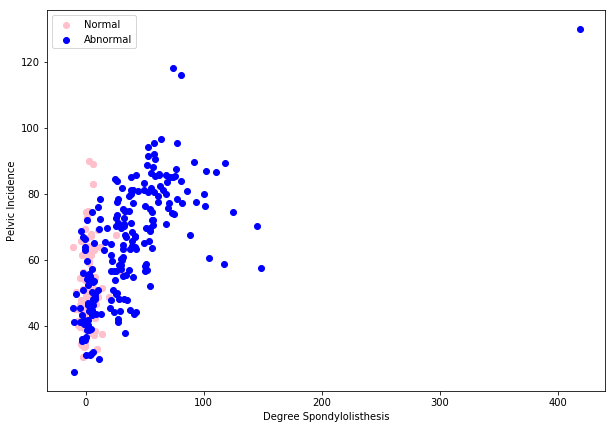

In [27]:
plt.figure(figsize=[10,7])
plt.scatter(normal.degree_spondylolisthesis, normal.pelvic_incidence, label='Normal', color='pink')
plt.scatter(abnormal.degree_spondylolisthesis, abnormal.pelvic_incidence, label='Abnormal', color='blue')
plt.xlabel('Degree Spondylolisthesis')
plt.ylabel('Pelvic Incidence')
plt.legend()
plt.show()

## Preparing data frames to be trained

In [28]:
data['class'] = [1 if each=='Normal' else 0 for each in data['class']]
data_class = data['class']   
y = data_class.values
x_data = data.drop(["class"], axis=1)  

## Normalization

In [29]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

## Training the KNN model and predicting

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
knn.score(x_test,y_test)


0.8010752688172043

In [37]:
from sklearn.metrics import classification_report
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       128
           1       0.70      0.66      0.68        58

   micro avg       0.81      0.81      0.81       186
   macro avg       0.78      0.77      0.77       186
weighted avg       0.80      0.81      0.80       186



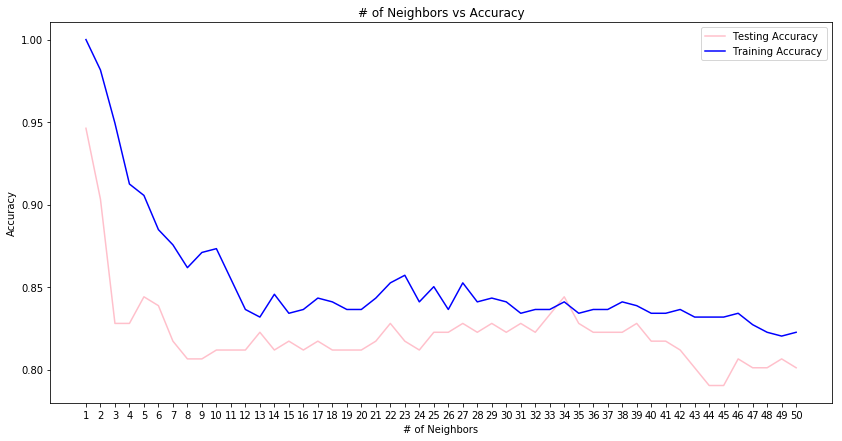

In [33]:
ran=np.arange(1,51)
training_accuracy=[]
testing_accuracy=[]

for i, k in enumerate(ran):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))
    
plt.figure(figsize=[14,7])
plt.plot(ran,testing_accuracy, label='Testing Accuracy', color='pink')
plt.plot(ran,training_accuracy, label='Training Accuracy', color='blue')
plt.legend()
plt.title('# of Neighbors vs Accuracy')
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(ran)
plt.show()
